In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df = df.rename(columns= {'Gender':'gender', "Age":'age',
                    'Annual Income (k$)': 'anual_income',
                    'Spending Score (1-100)' : 'spending_score'})

df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

df.head()

,CustomerID,gender,age,anual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [15]:
from sklearn.cluster import KMeans

X = df.drop(['CustomerID','gender'], axis=1)

clusters = []

for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

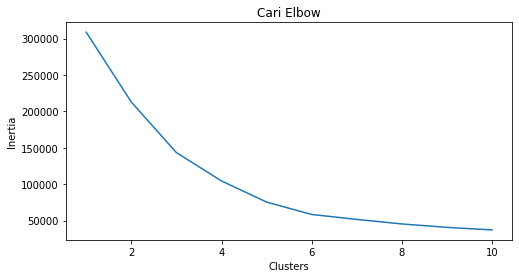

In [21]:
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y = clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

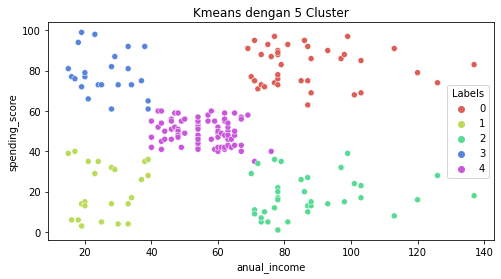

In [24]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_


plt.figure(figsize=(8,4))

sns.scatterplot(x=X['anual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('Kmeans dengan 5 Cluster')
plt.show()